In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving emotion_detection_model.h5 to emotion_detection_model.h5
Saving real_time_emotion.py to real_time_emotion.py


In [ ]:
!pip install tensorflow opencv-python


Saving 22.jpg to 22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


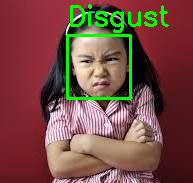

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # To display images in Colab

# Upload the image you want to test
uploaded = files.upload()

# Load the model
model = load_model('emotion_detection_model.h5')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Read the uploaded image (change the filename to match your uploaded image)
image_path = list(uploaded.keys())[0]  # Get the filename of the uploaded image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use OpenCV's face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Process each face found
for (x, y, w, h) in faces:
    face = gray[y:y+h, x:x+w]

    # Resize the face image to match the model input
    face_resized = cv2.resize(face, (48, 48))
    face_resized = face_resized.astype('float32') / 255
    face_resized = np.expand_dims(face_resized, axis=-1)  # Add channel dimension for grayscale
    face_resized = np.expand_dims(face_resized, axis=0)  # Add batch dimension

    # Predict emotion
    prediction = model.predict(face_resized)
    emotion = emotion_labels[np.argmax(prediction)]

    # Draw rectangle and display emotion label
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image in Colab
cv2_imshow(image)
